In [3]:
import sys
sys.path.append("..")
import time
import numpy as np
import seaborn as sns
import importlib
import MCTS.mcts_agent
import NASBench201MCTS
importlib.reload(MCTS.mcts_agent)
importlib.reload(NASBench201MCTS)
sns.set_context("notebook")
sns.set_theme(sns.plotting_context("notebook", font_scale=1), style="whitegrid", palette=sns.color_palette("deep"))
from MCTS.mcts_agent import MCTSAgent, UCT
from NASBench201MCTS import NASBench201UCT, NASBench201RAVE, NASBench201GRAVE
from nas_201_api import NASBench201API as API

ModuleNotFoundError: No module named 'torch._functorch'

In [42]:
t1 = time.time()
api = API('/userdata/T0259728/Bureau/NAS-Bench-201-v1_1-096897.pth', verbose=False)
t2 = time.time()
print(f"API inistialized in {t2-t1} seconds.")

API inistialized in 58.36985921859741 seconds.


In [43]:
from NASBench201Node import NASBench201Node, NASBench201AMAFNode, NASBench201Cell

In [44]:
N_RUNS = 20

In [46]:
avg_rewards_uct = []
avg_best_reward_uct = []

for n_run in range(N_RUNS):
    print(f"[{n_run}/{N_RUNS}]")        
    root_node = NASBench201Node(state=NASBench201Cell(4))
    uct = NASBench201UCT(root_node, api,
                      params_path="/userdata/T0259728/projets/nas/params.json", disable_tqdm=True)
    uct.C = 0.1
    uct.n_iter=500
    uct.playouts_per_selection = 1
    returned_node, all_rewards, best_reward = uct.main_loop()
    avg_rewards_uct.append(all_rewards)
    avg_best_reward_uct.append(best_reward)

[0/20]
[1/20]
[2/20]
[3/20]
[4/20]
[5/20]
[6/20]
[7/20]
[8/20]
[9/20]
[10/20]
[11/20]
[12/20]
[13/20]
[14/20]
[15/20]
[16/20]
[17/20]
[18/20]
[19/20]


In [47]:
avg_rewards_rave = []
avg_best_reward_rave = []

for n_run in range(N_RUNS):
    try: 
        print(f"{n_run}/{N_RUNS}")
        root_node = NASBench201AMAFNode(state=NASBench201Cell(4))
        rave = NASBench201RAVE(root_node, api,
                          params_path="/userdata/T0259728/projets/nas/params.json", disable_tqdm=True)
        rave.C = 0.1
        rave.b=0.1
        rave.n_iter=500
        rave.playouts_per_selection = 1
        returned_node, all_rewards, best_reward = rave.main_loop()
        avg_rewards_rave.append(all_rewards)
        avg_best_reward_rave.append(best_reward)
    except Exception:
        continue

0/20
1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20


In [48]:
avg_rewards_grave = []
avg_best_reward_grave = []

for n_run in range(N_RUNS):
    try: 
        print(f"{n_run}/{N_RUNS}")
        root_node = NASBench201AMAFNode(state=NASBench201Cell(4))
        grave = NASBench201GRAVE(root_node, api,
                          params_path="/userdata/T0259728/projets/nas/params.json", disable_tqdm=True)
        grave.C = 0.1
        grave.b=0.1
        grave.ref = 10
        grave.n_iter=500
        grave.playouts_per_selection = 1
        returned_node, all_rewards, best_reward = grave.main_loop()
        avg_rewards_grave.append(all_rewards)
        avg_best_reward_grave.append(best_reward)
    except Exception:
        continue

0/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 824.91it/s]


1/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 908.57it/s]


2/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 933.33it/s]


3/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 910.93it/s]


4/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 882.99it/s]


5/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 856.38it/s]


6/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 860.46it/s]


7/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 712.09it/s]


8/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 714.27it/s]


9/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 785.80it/s]


10/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 781.10it/s]


11/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 696.45it/s]


12/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 732.27it/s]


13/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 797.68it/s]


14/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 939.07it/s]


15/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 892.39it/s]


16/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 818.93it/s]


17/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 902.53it/s]


18/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 862.46it/s]


19/20


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 654.94it/s]


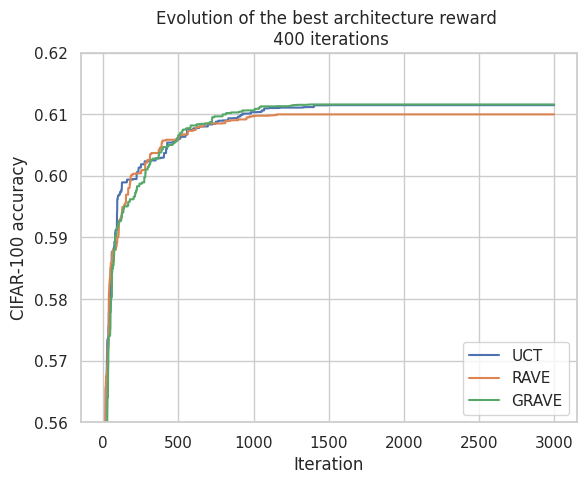

In [49]:
import matplotlib.pyplot as plt
plt.plot(np.mean(np.array(avg_be st_reward_uct), axis=0), label="UCT")
plt.plot(np.mean(np.array(avg_best_reward_rave), axis=0), label="RAVE")
plt.plot(np.mean(np.array(avg_best_reward_grave), axis=0), label="GRAVE")
plt.title("Evolution of the best architecture reward \n 400 iterations"); plt.xlabel("Iteration"); plt.ylabel("CIFAR-100 accuracy"); plt.legend();
plt.ylim([0.56,0.62]);
# plt.savefig("../figures/uct_vs_rave_vs_grave_best_reward_400.png")
plt.show()

In [212]:
importlib.reload(MCTS.mcts_agent)
importlib.reload(NASBench201MCTS)
from NASBench201MCTS import NASBench201UCT_NTK
import tensorly as tl
tl.set_backend("pytorch")

In [ ]:
avg_rewards_uct_ntk = []
avg_best_reward_uct_ntk = []
avg_accuracies_uct_ntk = []
avg_best_accuracy_uct_ntk = []

for n_run in range(N_RUNS):
    print(f"[{n_run}/{N_RUNS}]")        
    root_node = NASBench201Node(state=NASBench201Cell(4))
    ntk = NASBench201UCT_NTK(root_node, api,
                      params_path="/userdata/T0259728/projets/nas/params.json", disable_tqdm=False)
    ntk.C = 0.1
    ntk.n_iter=400
    ntk.playouts_per_selection = 1
    returned_node, all_rewards, best_reward, all_accuracies, best_accuracies = ntk.main_loop()
    avg_rewards_uct_ntk.append(all_rewards)
    avg_best_reward_uct_ntk.append(best_reward)
    avg_accuracies_uct_ntk.append(all_accuracies)
    avg_best_accuracy_uct_ntk.append(best_accuracies)

[0/20]


100%|█████████████████████████████████████████| 400/400 [04:31<00:00,  1.48it/s]


[1/20]


100%|█████████████████████████████████████████| 400/400 [04:24<00:00,  1.51it/s]


[2/20]


100%|█████████████████████████████████████████| 400/400 [03:37<00:00,  1.84it/s]


[3/20]


100%|█████████████████████████████████████████| 400/400 [03:55<00:00,  1.70it/s]


[4/20]


100%|█████████████████████████████████████████| 400/400 [02:42<00:00,  2.46it/s]


[5/20]


100%|█████████████████████████████████████████| 400/400 [03:09<00:00,  2.11it/s]


[6/20]


100%|█████████████████████████████████████████| 400/400 [03:32<00:00,  1.88it/s]


[7/20]


100%|█████████████████████████████████████████| 400/400 [02:43<00:00,  2.44it/s]


[8/20]


 66%|███████████████████████████              | 264/400 [02:48<01:21,  1.67it/s]

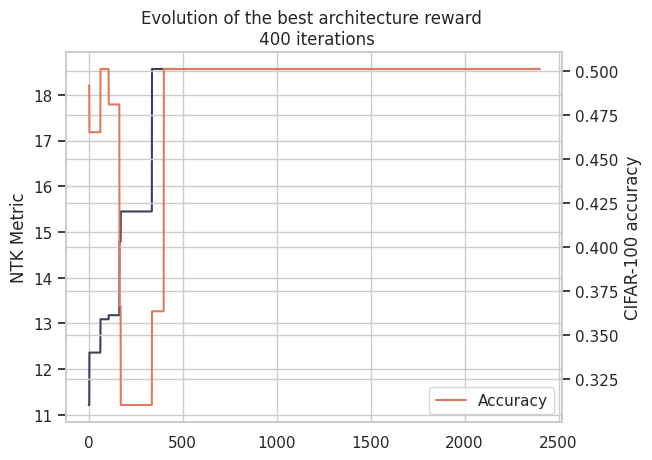

In [214]:
import matplotlib.pyplot as plt
# plt.plot(np.mean(np.array(avg_best_reward_uct), axis=0), label="UCT")
f, ax1 = plt.subplots()
ax1.plot(np.mean(np.array(avg_best_reward_uct_ntk), axis=0), label="NTK Metric", color="#3d405b")
ax1.set_ylabel("NTK Metric")

ax2 = ax1.twinx()
ax2.plot(np.mean(np.array(avg_best_accuracy_uct_ntk), axis=0), label="Accuracy", color="#e07a5f")
ax2.set_ylabel("CIFAR-100 accuracy")

plt.title("Evolution of the best architecture reward \n 400 iterations"); plt.xlabel("Iteration"); plt.ylabel("CIFAR-100 accuracy"); 
plt.legend();
# plt.ylim([0.56,0.62]);
plt.savefig("../figures/ntk_metric.png")
plt.show()

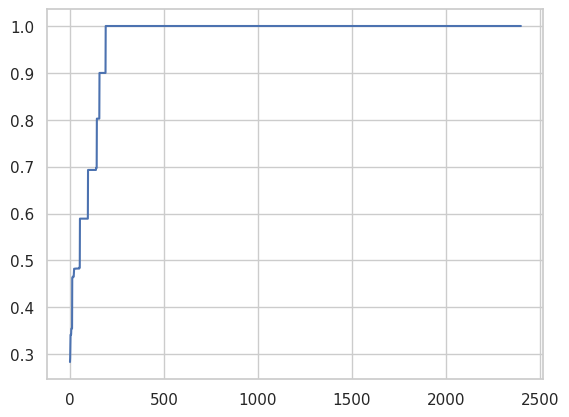

In [209]:
plt.plot(np.mean(np.array(avg_best_reward_uct_ntk), axis=0), label="kzjnj")

In [205]:
avg_best_reward_uct_ntk

[[0.23626493226432205,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.2856348395808931,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  0.31270472597201465,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  in